<img src="https://www.python.org/static/img/python-logo.png">

# Welcome to my lessons

---

**Bo Zhang** (NAOC, <mailto:bozhang@nao.cas.cn>) will have a few lessons on python.

- These are **very useful knowledge, skills and code styles** when you use `python` to process astronomical data.
- All materials can be found on [**my github page**](https://github.com/hypergravity/cham_teaches_python).
- **jupyter notebook** (formerly named **ipython notebook**) is recommeded to use

---
These lectures are organized as below:
1. install python
2. basic syntax
3. numerical computing
4. scientific computing
5. plotting
6. astronomical data processing
7. high performance computing
8. version control


# numpy
Docs: [http://docs.scipy.org/doc/numpy/user/index.html](http://docs.scipy.org/doc/numpy/user/index.html)
# scipy
Docs: [http://docs.scipy.org/doc/scipy/reference/index.html](http://docs.scipy.org/doc/scipy/reference/index.html)

# scipy.optimize.minimize
Docs: [http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

# optimization / minimization
![](https://upload.wikimedia.org/wikipedia/commons/7/72/Max_paraboloid.svg)

Populating the interactive namespace from numpy and matplotlib


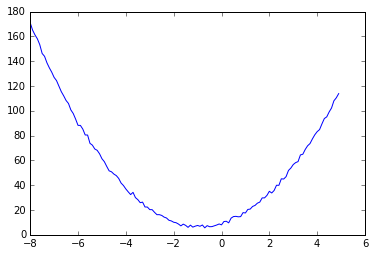

In [1]:
%pylab inline
np.random.seed(0)
p = [3.2, 5.6, 9.2]
x = np.arange(-8., 5., 0.1)
y = np.polyval(p, x) + np.random.randn(x.shape[0])*1.

plt.plot(x, y);

In [2]:
# STEP 1 - define your model
def my_model(p, x):
    return np.polyval(p, x)

# STEP 2 - define your cost function
def my_costfun(p, x, y):
    return np.sum((my_model(p, x) - y)**2)

# STEP 3 - minimize cost function
from scipy.optimize import minimize
result = minimize(my_costfun, np.array([2., 3., 5.]), args=(x,y) )

In [3]:
print result

      fun: 126.0244494460525
 hess_inv: array([[  2.02383493e-05,   4.77774924e-05,  -2.59571115e-04],
       [  4.77774924e-05,   3.19604362e-04,  -2.88164085e-04],
       [ -2.59571115e-04,  -2.88164085e-04,   7.70768871e-03]])
      jac: array([  9.53674316e-06,   5.72204590e-06,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 7
     njev: 14
   status: 0
  success: True
        x: array([ 3.22413722,  5.69072788,  9.08476247])


In [4]:
print 'RESULT:\n', result
print ''
print 'RELATIVE ERROR:\n', (result.x - p)/p*100., '%'
print ''
print 'Hessian ERROR:' #err = sqrt(diag(inv(Hessian)))
hess_err = np.sqrt(np.diag(result['hess_inv']))
print hess_err

RESULT:
      fun: 126.0244494460525
 hess_inv: array([[  2.02383493e-05,   4.77774924e-05,  -2.59571115e-04],
       [  4.77774924e-05,   3.19604362e-04,  -2.88164085e-04],
       [ -2.59571115e-04,  -2.88164085e-04,   7.70768871e-03]])
      jac: array([  9.53674316e-06,   5.72204590e-06,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 7
     njev: 14
   status: 0
  success: True
        x: array([ 3.22413722,  5.69072788,  9.08476247])

RELATIVE ERROR:
[ 0.75428809  1.62014064 -1.25258181] %

Hessian ERROR:
[ 0.00449871  0.01787748  0.08779344]


# MCMC (emcee)
- MCMC is a convenient tool for drawing a sample from a given probability distribution.
- Therefore, is mostly used to estimate parameters in Bayesian way.
- emcee: [http://dan.iel.fm/emcee/current/#](http://dan.iel.fm/emcee/current/#)

In [5]:
from emcee import EnsembleSampler

## a simple example - draw sample from uniformly distribution

In [6]:
def lnprob(theta):
    theta = np.array(theta)
    if np.all(theta>-3.) and np.all(theta<3.):
        return 0
    return -np.inf

In [7]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob)
pos = sampler.run_mcmc(p0, 2000)

In [ ]:
np.corrcoef(sampler.flatchain[0:2000, 0], sampler.flatchain[2000:4000, 0])

array([[ 1.        ,  0.05307972],
       [ 0.05307972,  1.        ]])

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

In [ ]:
import corner
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=[0., 0., 0.])
# fig.savefig("triangle.png")

## how about Gaussian distribution?
* 1-D Gauassian

    $p(x|\mu, \sigma) \propto 
    \exp{(-\frac{(x-\mu)^2}{2\sigma^2})}$


* N-D Gauassian

    $p(\overrightarrow{x}|\overrightarrow{\mu}, \Sigma) \propto \exp{(-\frac{1}{2}(\overrightarrow{x}-\overrightarrow{\mu})^T\Sigma (\overrightarrow{x}-\overrightarrow{\mu}))}$
          
    where $\Sigma$ is the covariance matrix

In [ ]:
def lnprob(x, mu, ivar):
#     if np.all(np.abs(x)<100.):
    x = x.reshape(-1, 1)
    mu = mu.reshape(-1, 1)
    return -np.dot(np.dot((x-mu).T, ivar), x-mu)
#     else:
#         return -np.inf

In [ ]:
mu = np.array([0.1, 0.2, 0.5])
cov = np.array([[1.0, 0.0, 0.0],
                [0.0, 10, 9],
                [0.0, 9, 10]])
ivar = np.linalg.inv(cov)
print 'ivar: \n', ivar
print 'det(cov): \n', np.linalg.det(cov)
print 'det(ivar): \n', np.linalg.det(ivar)

In [ ]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob, args=(mu, ivar), threads=10)
pos,prob,state = sampler.run_mcmc(p0, 2000)

In [ ]:
p0

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

In [ ]:
fig = corner.corner(sampler.flatchain, labels=["mu1", "mu2", "mu3"],
                    truths=mu)

In [ ]:
print mu
print ivar

## how to use MCMC to estimate model parameters?

suppose you choose a Gaussian likelihood:

$L(\theta|x_i,model) \propto \exp{(-\frac{(x_i-x_{i, model})^2}{2\sigma^2})} $

$ \log{(L(\theta|x_i,model))} \propto -\frac{(x_i-x_{i, model})^2}{2\sigma^2} = -\frac{1}{2}{\chi^2}$


In [ ]:
def lnprior(theta):
    if np.all(np.abs(theta)<10000.):
        return 0
    else:
        return -np.inf

In [ ]:
def lnlike(theta, x, y):
    y_model = np.polyval(theta, x)
    return -np.sum((y_model-y)**2)

In [ ]:
def lnprob(theta, x, y):
    return lnprior(theta)+lnlike(theta, x, y)

In [ ]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y), threads=10)
pos,prob,state = sampler.run_mcmc(p0, 500)

In [ ]:
np.corrcoef(sampler.flatchain[0:500, 0], sampler.flatchain[500:1000, 0])

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

In [ ]:
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=p)

In [ ]:
sampler.reset()
pos,prob,state = sampler.run_mcmc(pos, 2000)

In [ ]:
np.corrcoef(sampler.flatchain[0:2000, 0], sampler.flatchain[4000:6000, 0])

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

In [ ]:
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=p)
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=result.x)

## comparison with the results from optimization

In [ ]:
# truth
p

In [ ]:
# MCMC results
np.percentile(sampler.flatchain, [15., 50., 85.], axis=0)

In [ ]:
print result.x - hess_err
print result.x
print result.x + hess_err